In [2]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\timot\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [32]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')

In [41]:
df_DA_US_group= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)



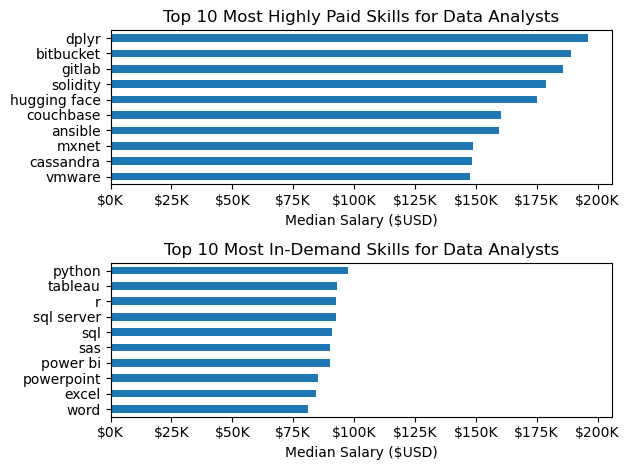

In [55]:
fig,ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend=False)
ax[0].set_title('Top 10 Most Highly Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


fig.tight_layout()

In [56]:
import seaborn as sns

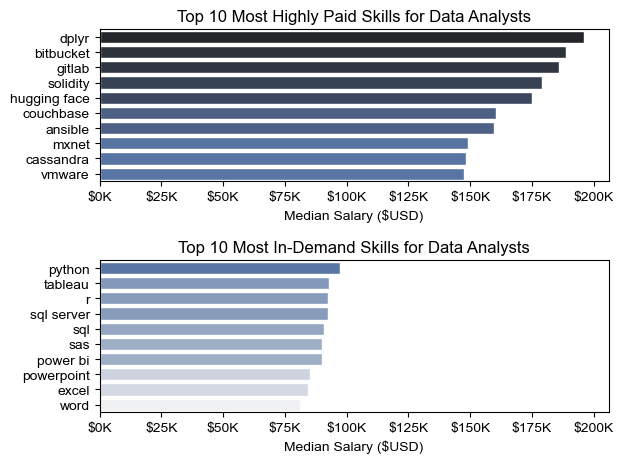

In [62]:
fig,ax = plt.subplots(2,1)

#df_DA_top_pay[::-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend=False)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette= 'dark:b_r', legend = False)
ax[0].set_title('Top 10 Most Highly Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary ($USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#df_DA_skills[::-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend=False)
sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette='light:b',  legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


fig.tight_layout()